In [45]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling  import ProfileReport

In [2]:
# Load the dataset
file_path = 'AirQualityUCI.csv' 
df= pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


In [4]:
# Check for and handle missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [26]:
df.describe(include='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,1900-01-01 11:29:54.806028032,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
min,2004-03-10 00:00:00,1900-01-01 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,1900-01-01 05:00:00,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,2004-09-21 00:00:00,1900-01-01 11:00:00,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2004-12-28 00:00:00,1900-01-01 18:00:00,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2005-04-04 00:00:00,1900-01-01 23:00:00,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000
std,NaN,NaN,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670


In [47]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
duplicates = duplicate_rows.shape
duplicates

(0, 15)

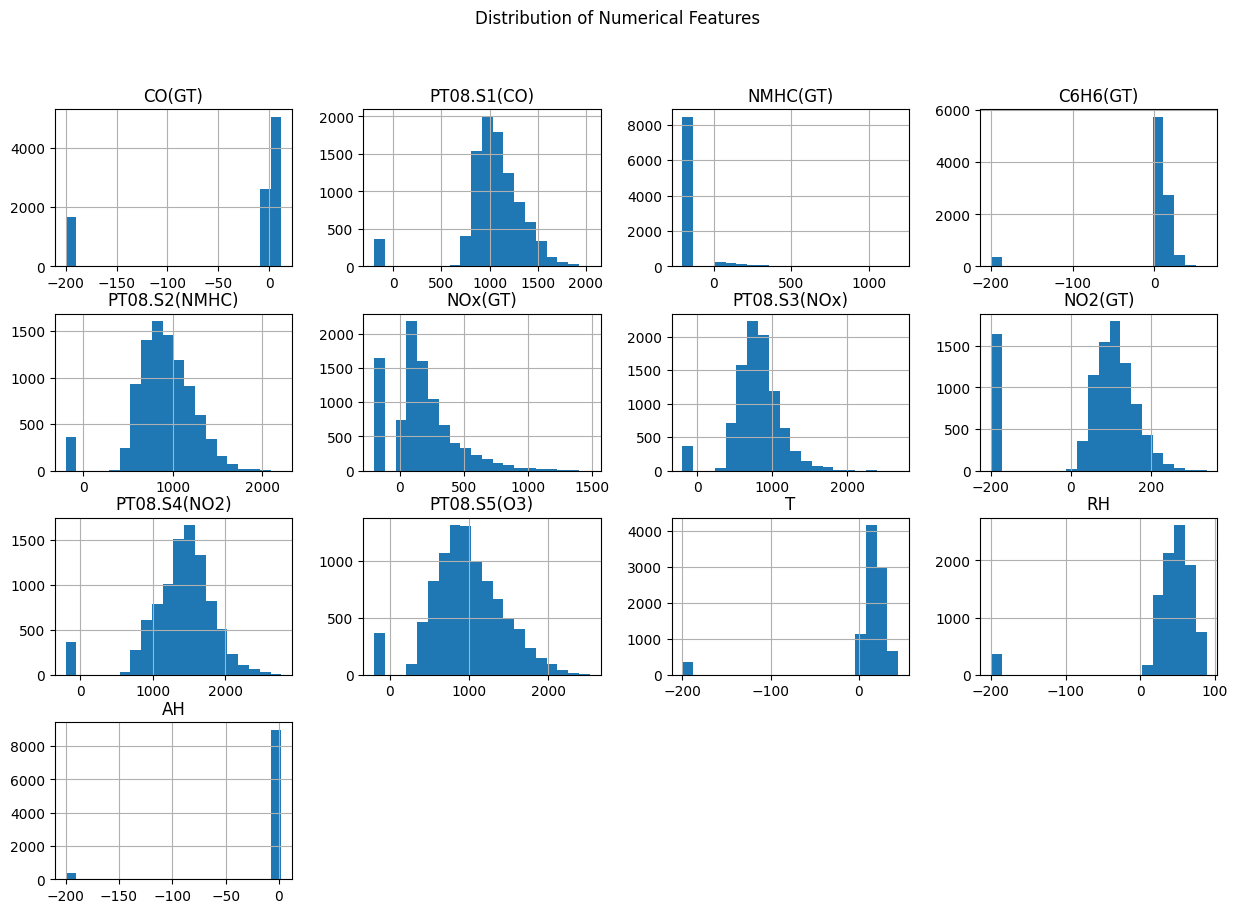

In [5]:
# Explore the distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

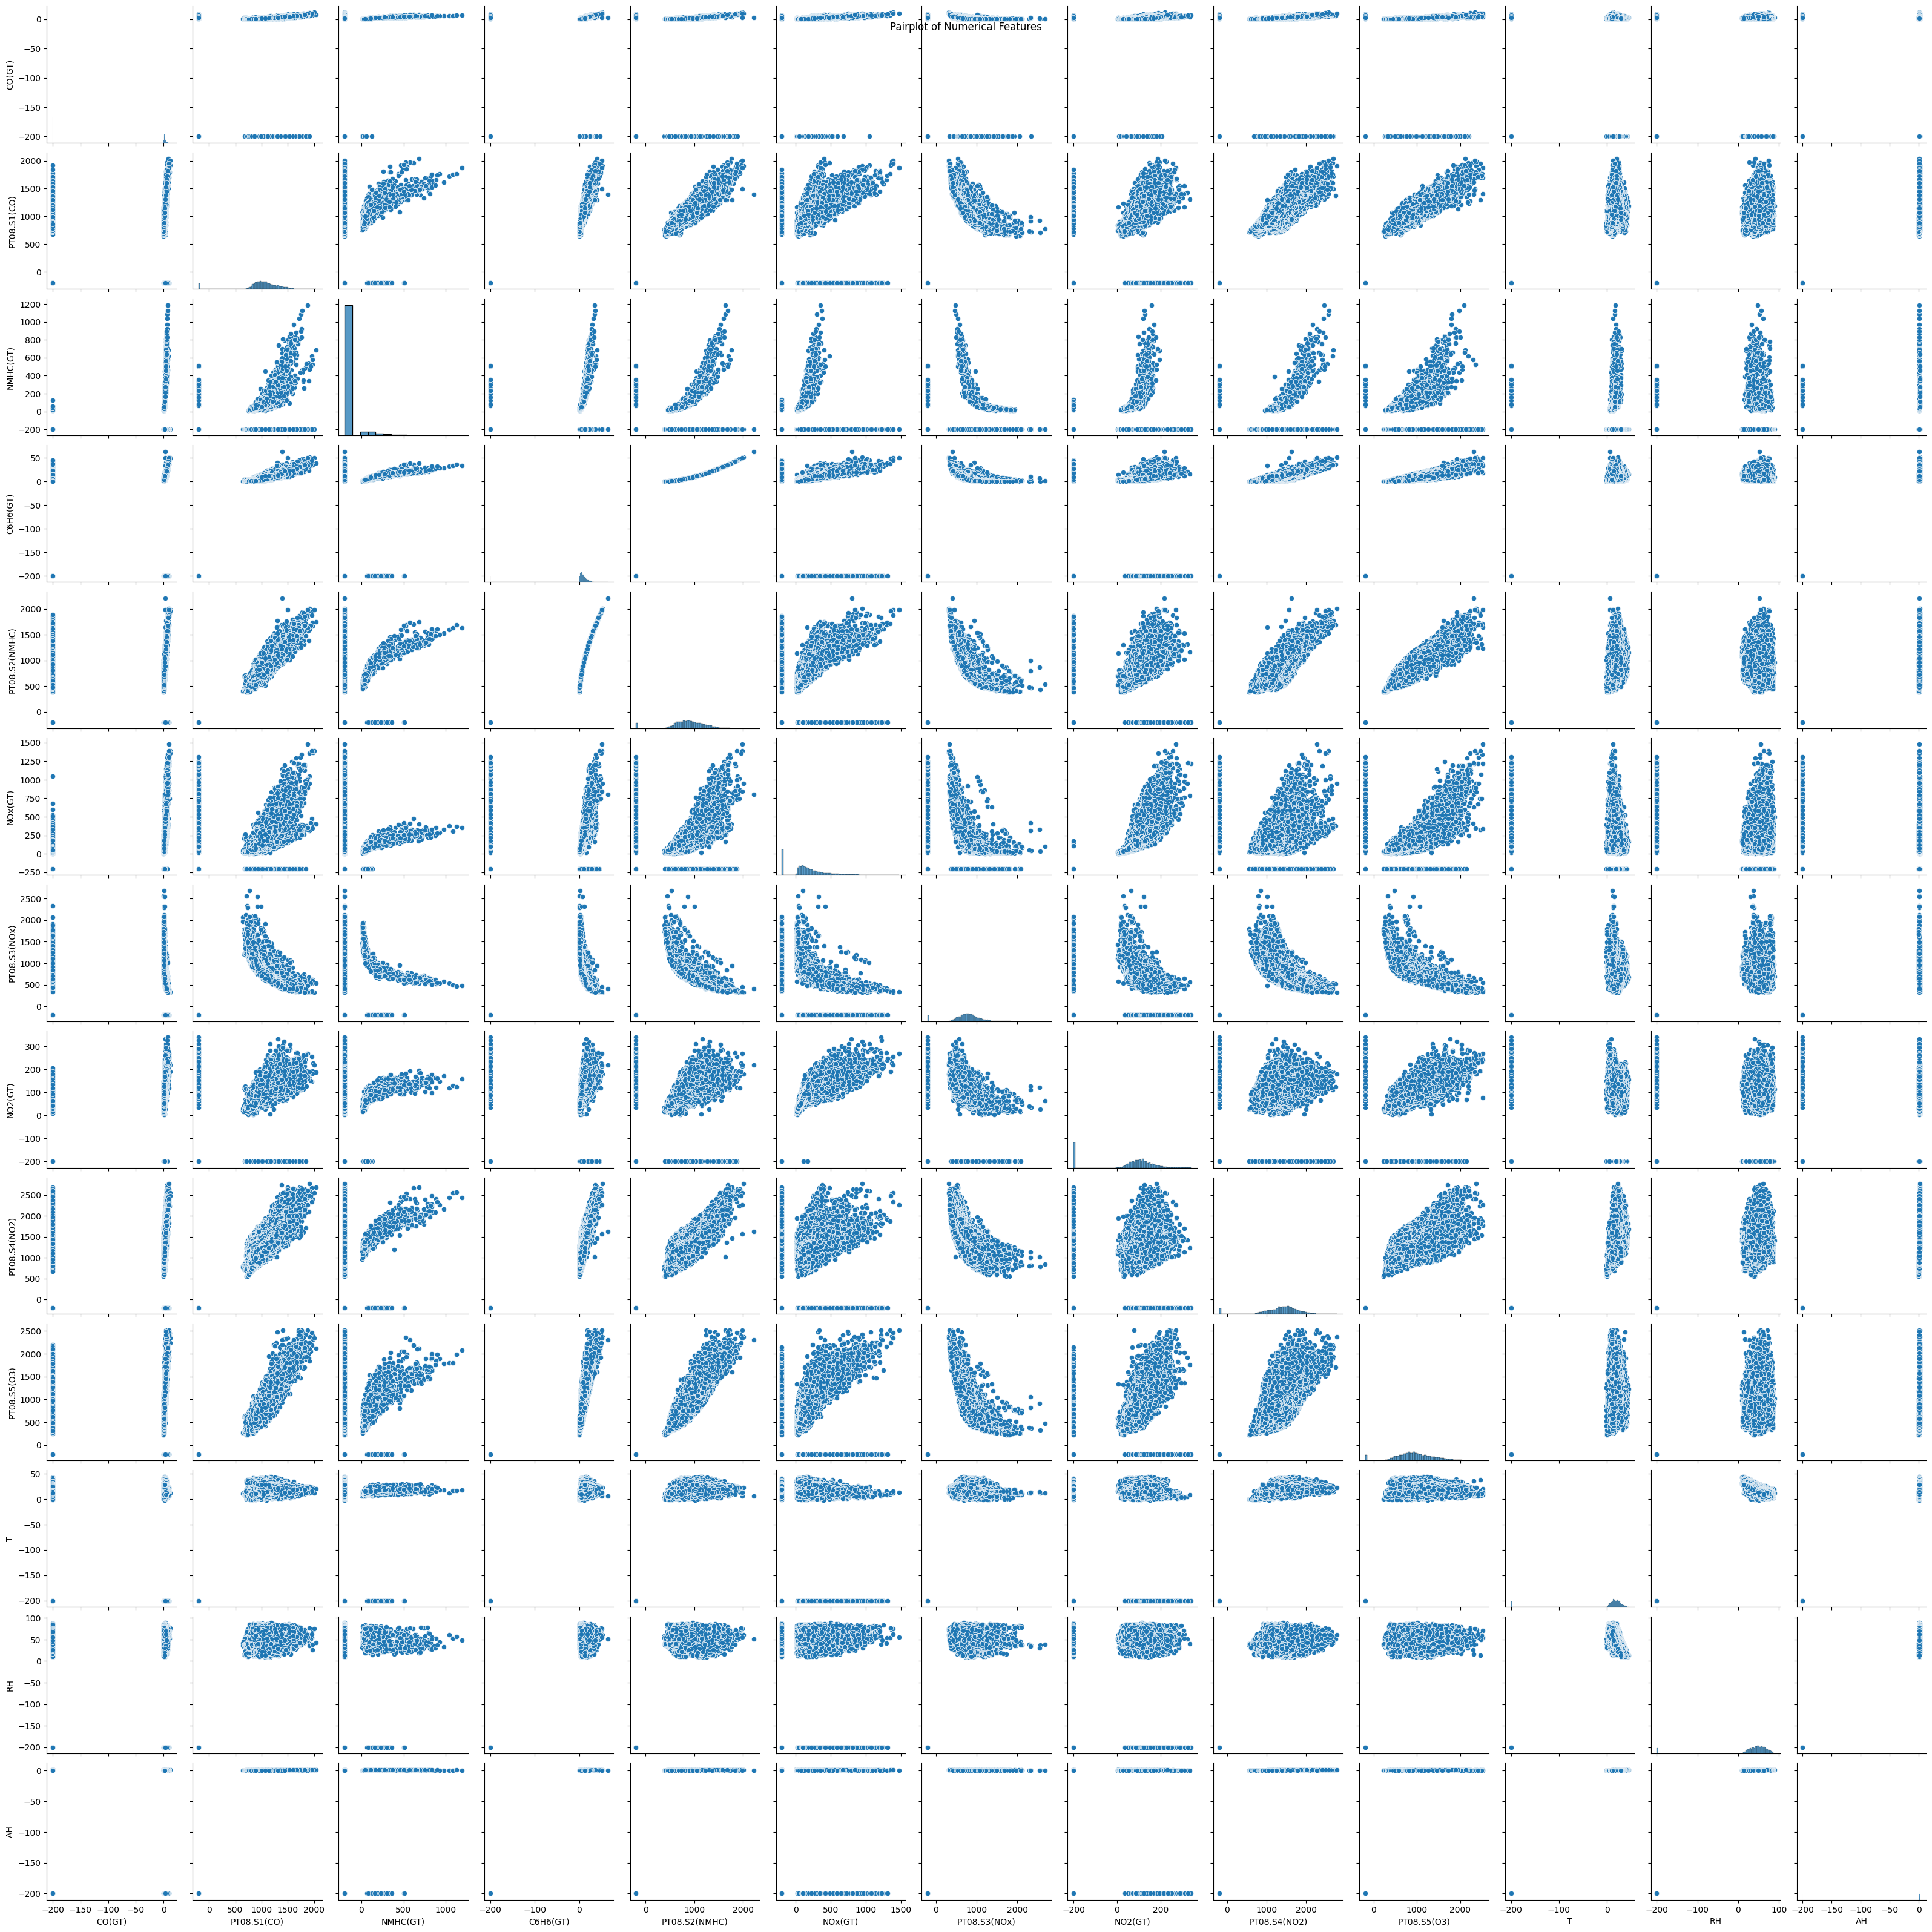

In [6]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features")
plt.show()

In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

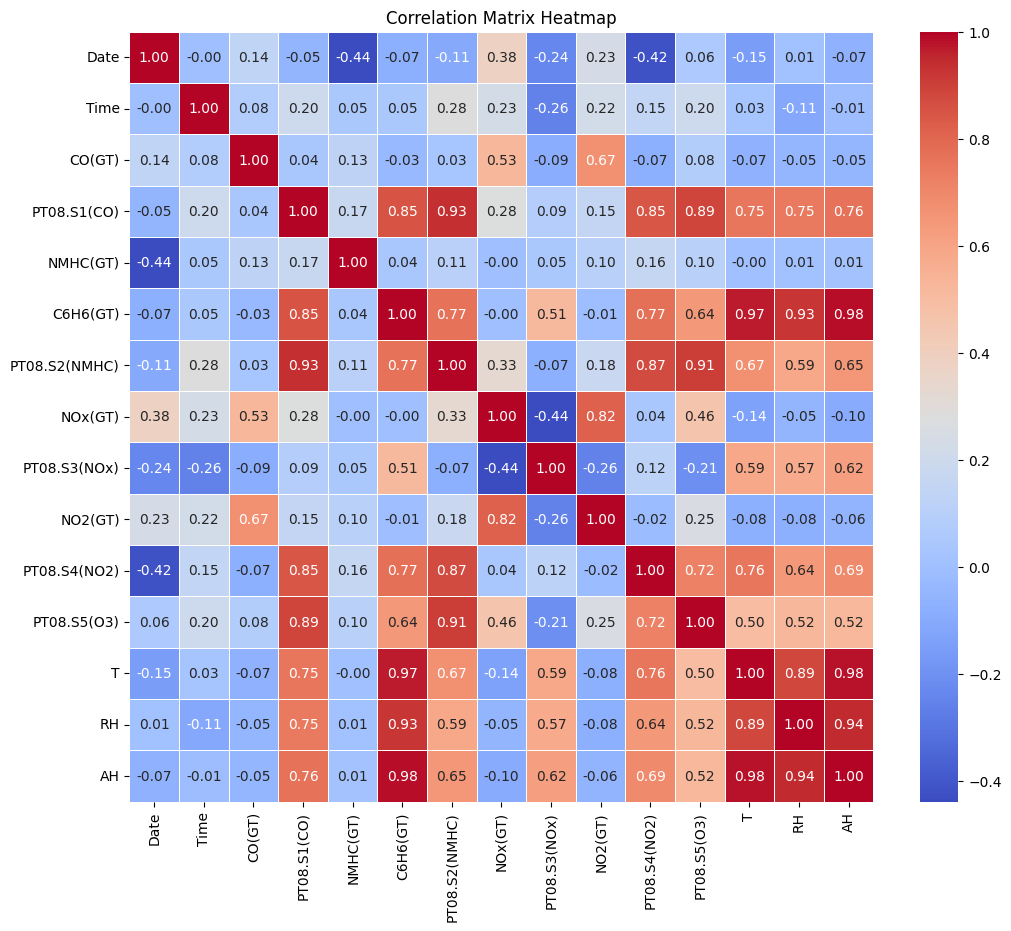

In [12]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24440\3886060732.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))


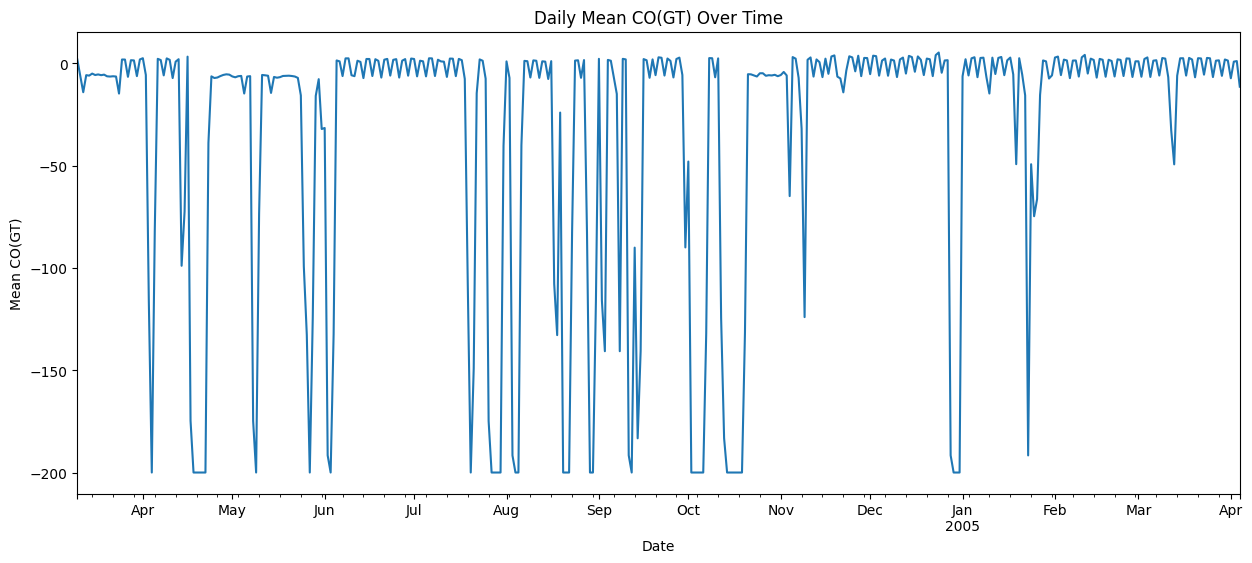

In [25]:
# Time series analysis
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('DateTime', inplace=True)
daily_mean_CO_GT = df['CO(GT)'].resample('D').mean()


plt.figure(figsize=(15, 6))
daily_mean_CO_GT.plot(title='Daily Mean CO(GT) Over Time')
plt.xlabel('Date')
plt.ylabel('Mean CO(GT)')
plt.show()


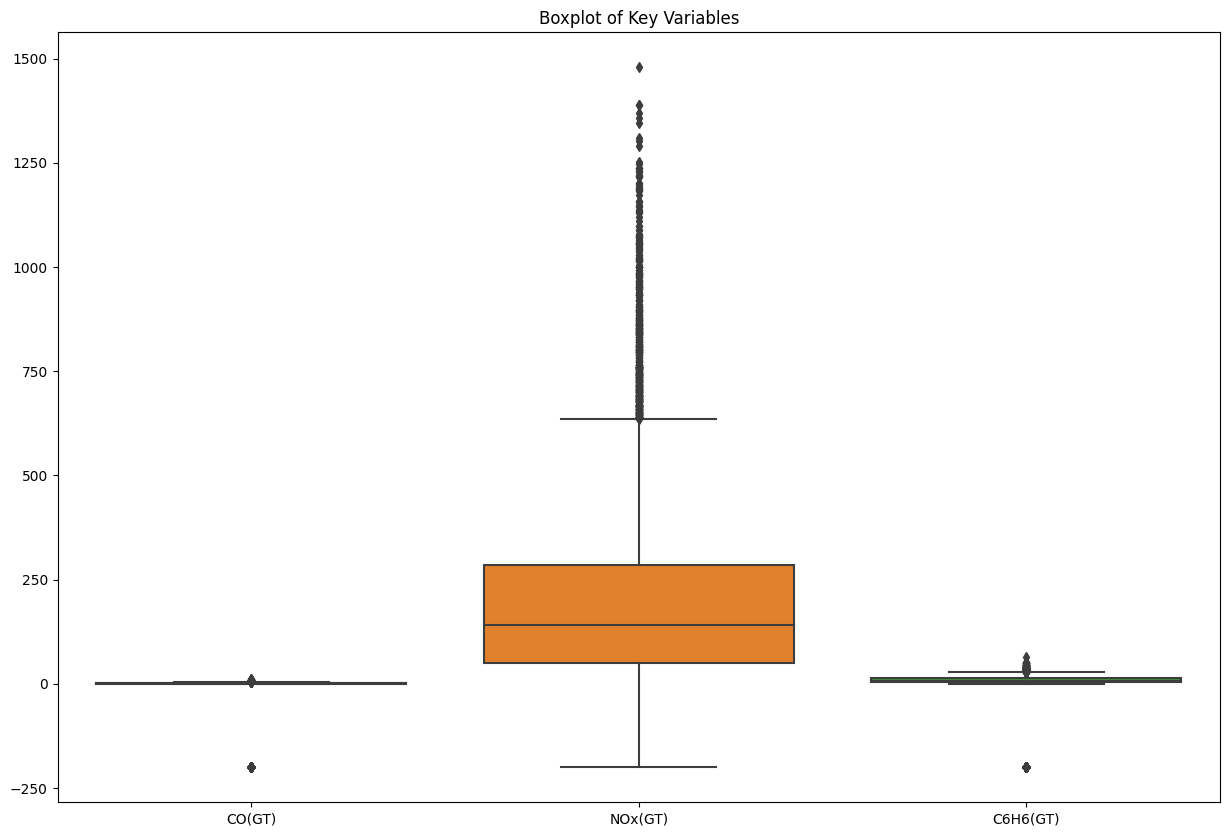

In [27]:
# Visualize distribution of key variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']])
plt.title("Boxplot of Key Variables")
plt.show()

In [46]:
pf= ProfileReport(df,title="EDA report",explorative=True)

pf.to_file("RDA report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [51]:
# Select features (X) and target variable (y)
X = df[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
        'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
y = df['CO(GT)']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Random Forest Regression Model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
# Make predictions on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

In [75]:

# Predict on the test set
y_pred = linear_reg_model.predict(X_test)
y_pred1=random_forest_model.predict(X_test)

In [76]:

# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_name = "linear_reg_model" 

print(f"{linear_reg_model} Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")

LinearRegression() Model Performance:
Mean Squared Error: 2863.6089690433723
R-squared: 0.5153096813141793




In [91]:
# Assuming y_test and y_pred are your true and predicted values
mse1 = mean_squared_error(y_test, y_pred1)
r2_random = r2_score(y_test, y_pred1)

model_name = "random_forest_model" 

print(f"{random_forest_model} Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")

RandomForestRegressor(random_state=42) Model Performance:
Mean Squared Error: 2863.6089690433723
R-squared: 0.5153096813141793




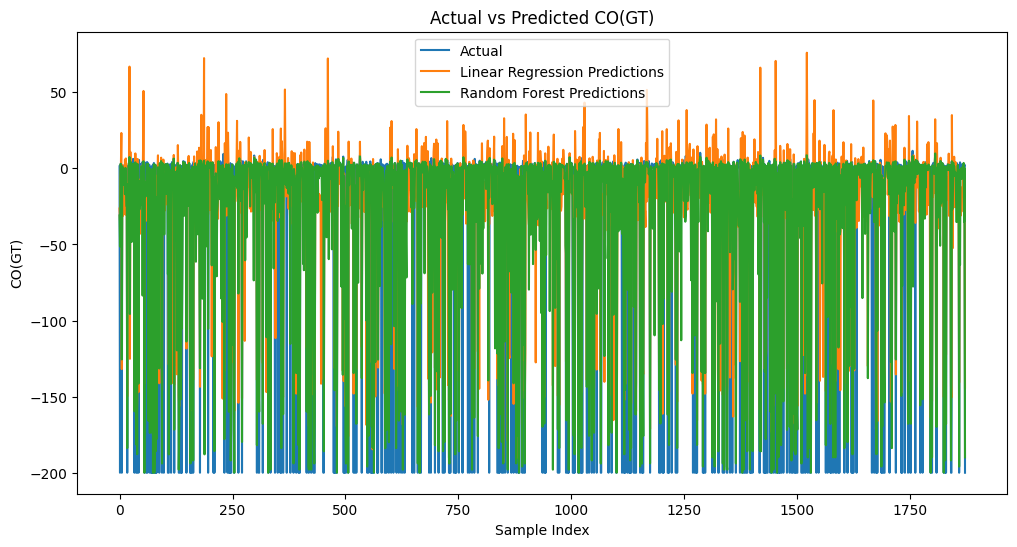

In [66]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_linear_reg, label='Linear Regression Predictions')
plt.plot(y_pred_random_forest, label='Random Forest Predictions')
plt.title('Actual vs Predicted CO(GT)')
plt.xlabel('Sample Index')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

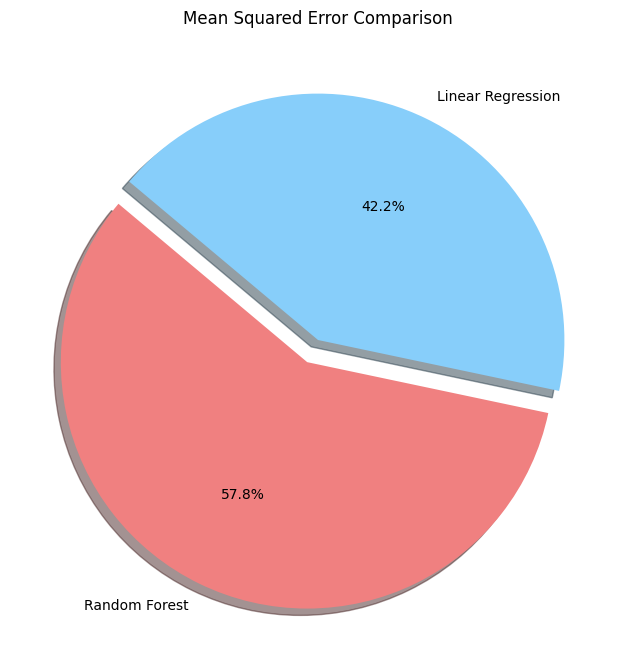

In [84]:
# Pie Plot
labels = ['Random Forest', 'Linear Regression']
sizes = [mse , mse1]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Mean Squared Error Comparison')
plt.show()


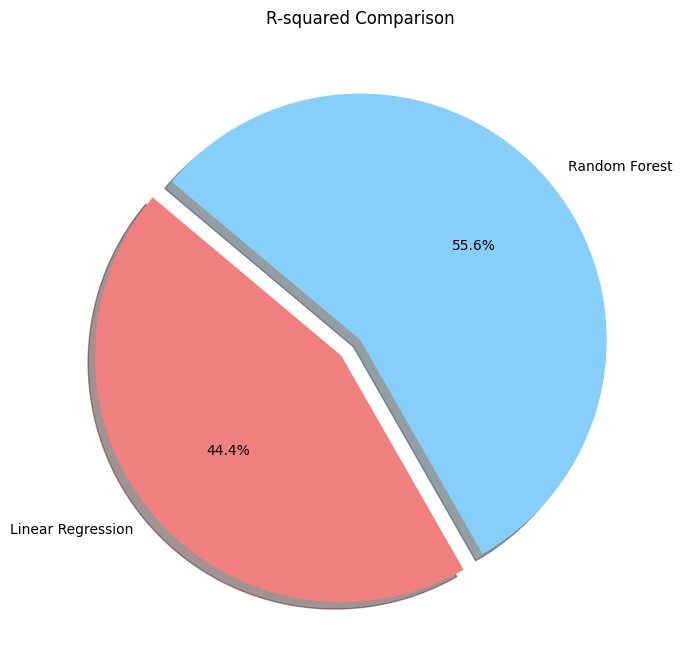

In [92]:
# Pie Plot for R-squared Comparison
labels_r2 = ['Linear Regression', 'Random Forest']
sizes_r2 = [r2, r2_random]
colors_r2 = ['lightcoral', 'lightskyblue']
explode_r2 = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes_r2, explode=explode_r2, labels=labels_r2, colors=colors_r2,  autopct='%1.1f%%',shadow=True, startangle=140)
plt.title('R-squared Comparison')
plt.show()